# Математическая статистика
## Практическое задание 3

В данном задании рассматриваются свойства условного математического ожидания. В частности, рассматривается модель смеси гауссовских распределений.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 3 балла
* Задача 2 - 1 балл
* Задача 3 - 2 балла
* Задача 4 - 7 баллов
* Задача 5<font size="5" color="red">\*</font> - 10 баллов

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps
from math import *

**Задача 1.** На вероятностном пространстве $\left(\mathbb{R}_+, \mathcal{B}(\mathbb{R}_+), \mathsf{P}\right)$, где $\mathsf{P}$ --- экспоненциальное распределение с параметром $\lambda$, задана случайная величина $\xi$ по правилу $\xi(\omega) = \omega$. Cигма-алгебра $\mathcal{G}$ порождена счетной системой событий $\{B_n\}_{n\geq1},$ где $B_n = \{n-1\leq \omega<n\}.$. Для $\omega \in [0, 5]$ постройте графики 
* плотности распределения $\mathsf{P}$ для $\lambda \in \{1, 3, 10\}$
* $\xi$ и $\mathsf{E}(\xi | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$
* $\xi^2$ и $\mathsf{E}(\xi^2 | \mathcal{G})$ как функции от $\omega$ для $\lambda \in \{1, 3, 10\}$

Используйте приведенный ниже шаблон. Одному и тому же значению $\lambda$ во всех графиках должен соответствовать один и тот же цвет.

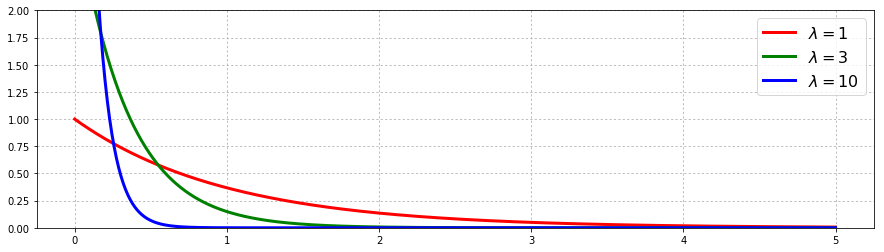

In [2]:
# График 1
grid = np.linspace(0, 5, 1000)
plt.figure(figsize=(15, 4))
for λ, color in [(1, 'red'), (3, 'green'), (10, 'blue')]:
    plt.plot(grid, sps.expon(scale=1 / λ).pdf(grid), lw=3, color=color, label='$\\lambda={}$'.format(λ))
    plt.legend(fontsize=16)
    plt.ylim((0, 2))
    plt.grid(ls=':')
plt.show()

In [3]:
def draw(xi_label, function, integral):
    grid = np.linspace(0, 5, 1000)
    plt.figure(figsize=(15, 5))
    plt.plot(grid, [function(x) for x in grid], lw=3, label='${}$'.format(xi_label))
    for λ, color in [(1, 'red'), (3, 'green'), (10, 'cyan')]:
        # [0, 5) = [0, 1) ⨆ ... ⨆ [4, 5)
        # D_i := [i, i + 1)
        for i in range(5):  # события из сигма-алгебры
            # Для графика ξ: E(ξ * I_{D_i}) = int λ * x * exp(-λx) = -exp(-λx)(λx+1)/λ from i to i+1
            # Для графика ξ^2: E(ξ^2 * I_{D_i}) = int λ * x^2 * exp(-λx) = -exp(-λx)(λ^2*x^2 + 2λx + 2) / λ^2 from i to i+1
            expect = integral(λ, i + 1) - integral(λ, i)

            # P(D_i) = P([i, i + 1)) = (1 - exp(-λ(i+1))) - (1 - exp(-λi))
            p_d_i = exp(-λ * i) - exp(-λ * (i + 1))

            plt.hlines(expect / p_d_i, i, i + 1, color=color, lw=3, label=('$\\mathsf{{E}}({}|\\mathcal{{G}})$ при $\\lambda = {}$'.format(xi_label, λ) if i == 0 else ''))
        plt.xlabel('$\\Omega$', fontsize=20)
        plt.legend(fontsize=16)
        plt.grid(ls=':')
    plt.show()

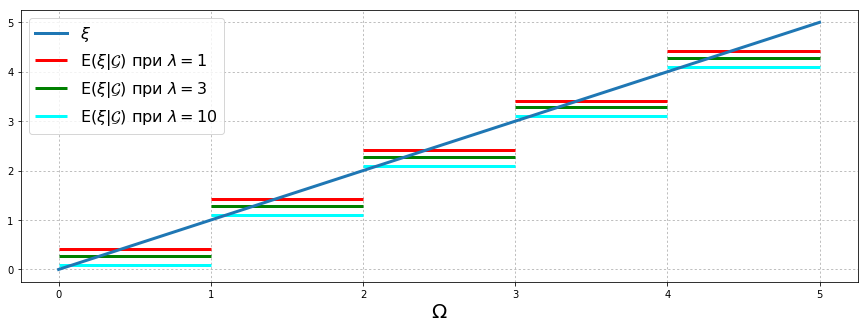

In [4]:
# График 2
draw('\\xi', lambda x: x, lambda λ, x: -exp(-λ * x) * (λ * x + 1) / λ)

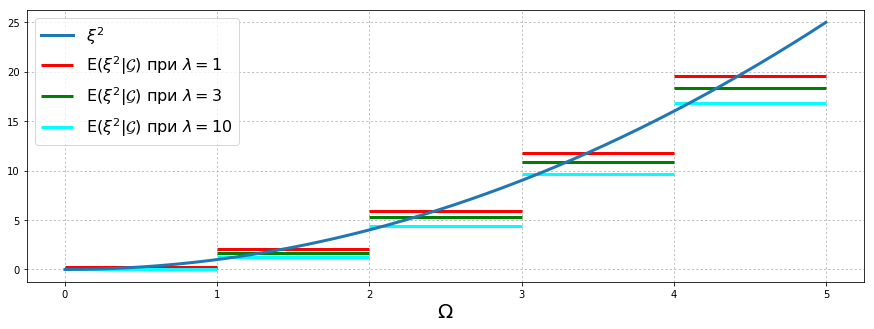

In [5]:
# График 3
draw('\\xi^2', lambda x: x * x, lambda λ, x: -exp(-λ * x) * (λ ** 2 * x ** 2 + 2 * λ * x + 2) / λ ** 2)

**Вывод:** Мы убедились, что $E(\xi|G)$ и $E(\xi^2|G)$ являются $G$ измеримыми случайными величинами. Также они в некотором смысле являются усреднением случайной величины по сигма-алгебре.

**Задача 2.** 
Пусть $\xi = (\xi_1, \xi_2) \sim \mathcal{N}(a, \Sigma)$, где $a=0$ и $\Sigma = \begin{pmatrix}10 & 8 \\ 8 & 10\end{pmatrix}$. Для $y \in \{-3, 0, 1, 5\}$ постройте графики условной плотности $f_{\left.\xi_1\right|\xi_2} \left(x\left|y\right.\right)$.

$|\Sigma| = 36$  
$\Sigma^{-1} = \begin{pmatrix}\frac{5}{18} & -\frac{2}{9} \\ -\frac{2}{9} & \frac{5}{18}\end{pmatrix}$  
$f_{\xi_1,\xi_2}(x,y) = \frac{1}{2\pi\sqrt{|\Sigma|}}e^{-\frac{1}{2}(x,y) \Sigma^{-1} \begin{pmatrix}x \\ y\end{pmatrix}}$  
$(x,y) \Sigma^{-1} \begin{pmatrix}x \\ y\end{pmatrix} = \frac{5}{18}(x^2+y^2) - \frac{4}{9}xy$  
$f_{\xi_1,\xi_2}(x,y) = \frac{1}{12\pi}e^{-\frac{1}{2} (\frac{5}{18}(x^2+y^2) - \frac{4}{9}xy)} = \frac{1}{12\pi}e^{-\frac{5}{36}(x^2+y^2) + \frac{2}{9}xy}$  
$f_{\xi_2}(y) = \int_{-\infty}^{+\infty}{f_{\xi_1,\xi_2}(x,y)dx} = \frac{1}{2\sqrt{5}\pi}e^{-\frac{y^2}{20}}$  
$f_{\xi_1|\xi_2}(x|y) = \frac{f_{\xi_1,\xi_2}(x,y)}{f_{\xi_2}(y)} = \frac{\sqrt{5}}{6}e^{-\frac{5}{36}x^2 - \frac{4}{45}y^2 + \frac{2}{9}xy}$

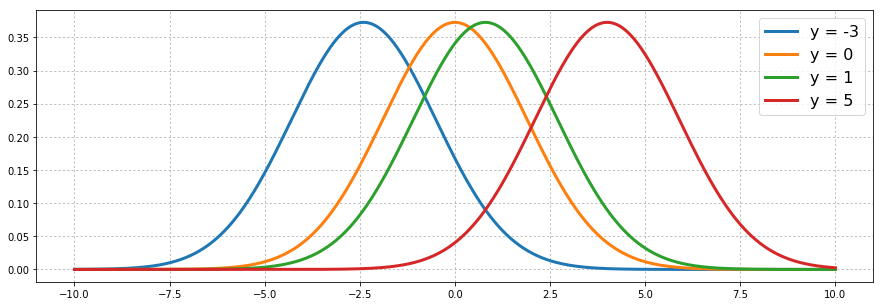

In [6]:
grid = np.linspace(-10, 10, 1000)
plt.figure(figsize=(15, 5))
for y in [-3, 0, 1, 5]:
    f_ξ1_ξ2 = sqrt(5) / 6 * np.exp(-5 / 36 * grid ** 2 - 4 / 45 * y ** 2 + 2 / 9 * grid * y)
    plt.plot(grid, f_ξ1_ξ2, linewidth=3, label='y = {}'.format(y))
    plt.legend(fontsize=16)
    plt.grid(ls=':')
plt.show()

**Вывод:** Мы построили график условной плотности при нескольких фиксированных значениях $y$. Видим, что значение $y$ влияет на сторону, в которую смещён график.

**Задача 3.**
Имеется множество серверов, которые периодически выходят из строя. 
Обозначим $\xi_i$ время между $i$-м моментом выхода из строя сервера и $(i+1)$-м.
Известно, что величины $\xi_i$ независимы в совокупности и имеют экспоненциальное распределение с параметром $\lambda$.

Обозначим $N_t$ --- количество серверов, которые вышли из строя к моменту времени $t$ (в начальный момент времени $N_0 = 0$).
В курсе случайных процессов будет доказано, что для любых $s < t$ величина $N_t - N_s \sim Pois(\lambda (t - s))$ и независима с $N_s$.
При этом $N_t$ как функция от $t$ будет называться пуассоновским процессом интенсивности $\lambda$.

Вам нужно знать, сколько серверов нужно докупить к моменту времени $t$ взамен вышедших из строя.
В момент времени $s$ предсказанием количества серверов, вышедших из строя к моменту времени $t$, будем считать величину $\mathsf{E}( N_t | N_s)$.

Сгенерируйте выборку случайных величин $\xi_i$ для $\lambda = 1/4$ в количестве, чтобы их сумма была больше 100.
Для $t=100$ постройте графики зависимости величины $\mathsf{E}( N_t | N_s)$ от $s$ в предополжении, что условное математическое ожидание было посчитано при значении $\lambda \in \{1/10, 1/4, 1/2, 1\}$. Нарисуйте также на графике горизонтальную прямую уровня $N_{100}$.

$E(N_t|N_s) = E(N_t-N_s|N_s) + E(N_s|N_s)$  
$N_t-N_s$ независим с $N_s$, поэтому $E(N_t-N_s|N_s) = E(N_t-N_s) = λ(t-s)$  
$N_s$ является $N_s$ измеримой, поэтому $E(N_s|N_s) = N_s$  
Итак, $E(N_t|N_s) = λ(t-s) + N_s$  

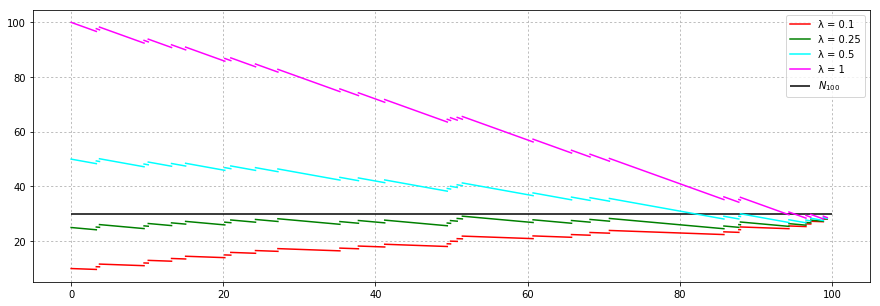

In [18]:
# чтобы сумма была больше ста, нужна взять чуть больше 25 штук
# для простоты возьмём 100
ξs = sps.expon(scale=4).rvs(size=100)
assert ξs.sum() > 100

t = 100
plt.figure(figsize=(15, 5))
for λ, color in [(1 / 10, 'red'), (1 / 4, 'green'), (1 / 2, 'cyan'), (1, 'magenta')]:
    for n_s in range(len(ξs)):
        s = ξs[:n_s].sum()
        if s + ξs[n_s] > t:
            break
        x1 = s
        x2 = s + ξs[n_s]
        y1 = λ * (t - x1) + n_s
        y2 = λ * (t - x2) + n_s
        plt.plot([x1, x2], [y1, y2], color=color, label='λ = {}'.format(λ) if n_s == 0 else '')
n_100 = min([n for n in range(len(ξs)) if ξs[:n].sum() >= t])
plt.hlines(n_100, 0, t, label='$N_{100}$')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** Видно, что когда мы считаем матожидание для $λ=1/4$, то есть для настоящего значения $λ$, получается очень точное предсказание числа вышедших из строя серверов. Для остальных $λ$ предсказание тем точнее, чем $s$ ближе к $t$, причём чем ближе значение $λ$ к настоящему, тем лучше предсказание.

**Задача 4.** 
Рассмотрим модель смеси многомерных гауссовских распределений, то есть распределение, имеющее плотность $p(x) = \sum\limits_{k=1}^K p_k(x) \mathsf{P}(T = k),$ где $T$ --- случайная величина, принимающая значения $\{1, ..., K\}$ и имеющая смысл номера компоненты смеси, а $p_k(x)$ --- плотность распределения $N(a_k, \Sigma_k)$.


Загрузите датасет "Ирисы Фишера", используя следующий код.

In [20]:
from sklearn.datasets import load_iris

data = load_iris()
sample = data['data']  # выборка
sample_types = data['target']  # номера компонент смеси

В предположении, что каждый класс имеет гауссовское распределение, оцените его параметры. Используйте для этого функции `numpy.mean` и `numpy.cov`. Проверьте, что матрица ковариаций получилась правильной --- возможно, придется предварительно поменять порядок осей (транспонировать). Напечатайте полученные оценки.

In [24]:
means_of_type = []
covaritaions_of_type = []

for type in [0, 1, 2]:
    # первые 50 ирисок --- первого класса, вторые 50 --- второго, последние 50 --- третьего
    sample_of_type = sample[type * 50:(type + 1) * 50]
    mean_of_type = np.mean(sample_of_type, axis=0)
    covaritaion_of_type = np.cov(sample_of_type.T)
    print(mean_of_type)
    print(covaritaion_of_type)
    print()

    means_of_type.append(mean_of_type)
    covaritaions_of_type.append(covaritaion_of_type)

[ 5.006  3.418  1.464  0.244]
[[ 0.12424898  0.10029796  0.01613878  0.01054694]
 [ 0.10029796  0.14517959  0.01168163  0.01143673]
 [ 0.01613878  0.01168163  0.03010612  0.00569796]
 [ 0.01054694  0.01143673  0.00569796  0.01149388]]

[ 5.936  2.77   4.26   1.326]
[[ 0.26643265  0.08518367  0.18289796  0.05577959]
 [ 0.08518367  0.09846939  0.08265306  0.04120408]
 [ 0.18289796  0.08265306  0.22081633  0.07310204]
 [ 0.05577959  0.04120408  0.07310204  0.03910612]]

[ 6.588  2.974  5.552  2.026]
[[ 0.40434286  0.09376327  0.3032898   0.04909388]
 [ 0.09376327  0.10400408  0.07137959  0.04762857]
 [ 0.3032898   0.07137959  0.30458776  0.04882449]
 [ 0.04909388  0.04762857  0.04882449  0.07543265]]



Нарисуйте график плотности (тепловую карту) в проекции на первые две координаты и нанесите на график точки выборки. При выполнении задания полезно вспомнить решение части 3 задачи 1 задания 1. Используйте шаблон ниже.

Имеем три четырёхмерных случайных вектора:  
$ξ=(ξ_1,...,ξ_4) \sim N(a_1, \Sigma_1)$  
$ζ=(ζ_1,...,ζ_4) \sim N(a_2, \Sigma_2)$  
$η=(η_1,...,η_4) \sim N(a_3, \Sigma_3)$  
Рассматриваются первые две компоненты каждого вектора:  
$ξ'=(ξ_1,ξ_2) \sim N(a'_1, \Sigma'_1)$  
$ζ'=(ζ_1,ζ_2) \sim N(a'_2, \Sigma'_2)$  
$η'=(η_1,η_2) \sim N(a'_3, \Sigma'_3)$  
Требуется построить усреднённую плотность этих векторов, то есть $\frac{ρ_{ξ'} + ρ_{ζ'} + ρ_{η'}}{3}$

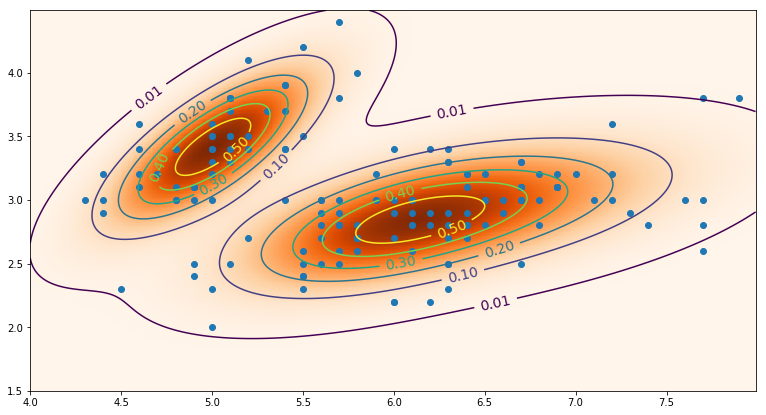

In [28]:
grid = np.mgrid[4:8:0.01, 1.5:4.5:0.01]
densities = [sps.multivariate_normal.pdf(np.dstack((grid[0], grid[1])), means_of_type[type][:2], covaritaions_of_type[type][:2, :2]) for type in range(3)]
density = np.mean(densities, axis=0)

plt.figure(figsize=(13, 7))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1])
CS = plt.contour(grid[0], grid[1], density, [0.01, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.clabel(CS, fontsize=14, inline=1, fmt='%1.2f', cmap='Set3')
plt.show()

Вычислите условное математическое ожидание $\mathsf{E}( X | I\{T \not= k\} = 1)$ для всех $k = 1,2,3$, где $X$ --- случайный вектор, имеющий распределение смеси.
Постройте графики условной плотности $p_{X|I\{T \not= k\}}\left(x \left| 1\right.\right)$ в проекции на первые две координаты. Подберите хорошие значения линий уровня.

In [ ]:
...

Классифицируйте все пространство по принципу $k = \text{arg}\max\limits_k p_{X|I\{T = k\}}\left(x \left| 1\right.\right)$.
Посчитайте долю ошибок на выборке.
Нарисуйте классификацию всего пространства в проекции на пары координат (0, 1), (1, 3) и (2, 3), где закрасьте разными цветами области, которые образовались в результате классификации.

In [ ]:
...

**Вывод:** У нас есть три класса, однако второй и третий очень похожи, это видно из значений среднего второй и третьей компонент смеси, а также из графика плотности.

**Задача 5<font size="5" color="red">\*</font>.** В предыдущей задача информация о принадлежности наблюдения конкретной компоненте смеси была известна заранее. Как выть в случае, если такой информации нет? Задача оценки параметров распределения смеси может быть решена с помощью иттерационного EM-алгоритма.

Опишите, как работает EM-алгоритм (это обязательное условие, при котором эта задача будет проверяться). Затем примените EM-алгоритм к Ирисам Фишера и к некоторым искусственно сгенерированным датасетам. Исследуйте, как результат зависит от параметров алгоритма. Сделайте вывод.

*Разобраться в EM-алгоритме помогут:*

https://basegroup.ru/community/articles/em

http://www.machinelearning.ru/wiki/index.php?title=%D0%95%D0%9C-%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC

https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

Bishop, C.M. Pattern Recognition and Machine Learning, глава 9.

*Реализация EM-алгоритма для смеси гауссовских распределений:*

http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture